In [12]:
import albumentations as A
import numpy as np
import os
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.pyplot import show



In [13]:
#OBS ändra path!
data_path = Path("D:\\Projektarbete\\blandat\\processed\\")

In [14]:
#OBS ändra namn vid behov
path_no = list((data_path / "1_cropped_no").rglob('*'))
path_yes = list((data_path / "1_cropped_yes").rglob('*'))

y0 = [0 for i in range(len(path_no))]
y1 = [1 for i in range(len(path_yes))]

CLASSES = {0:"no",1:"yes"}

In [15]:
CLASSES_list = []

for key in CLASSES:
    print(CLASSES[key])
    CLASSES_list.append(CLASSES[key])

no
yes


In [16]:
from collections import Counter

class_paths = path_no + path_yes
y = y0 + y1

print(Counter(y))

Counter({1: 133, 0: 76})


In [17]:
from sklearn.model_selection import train_test_split

X_train_paths, X_test_paths, y_train, y_test_val = train_test_split(class_paths, y, test_size = 0.1, stratify = y)


X_test, X_val, y_test, y_val = train_test_split(X_test_paths, 
                                                y_test_val, 
                                                test_size=0.50, 
                                                stratify=y_test_val)


print(Counter(y_train), Counter(y_test_val))

Counter({1: 120, 0: 68}) Counter({1: 13, 0: 8})


In [18]:
import cv2
import numpy as np

IMG_SIZE = (224,224)
X_train = []
for path in X_train_paths:
    img = cv2.imread(str(path))
    img = cv2.resize(img, IMG_SIZE)
    X_train.append(img)
X_train = np.asarray(X_train)

In [19]:
image = X_train[0]

In [198]:
list_of_aug = [
    #"A.AdvancedBlur()", module 'albumentations' has no attribute 'AdvancedBlur'
    "A.CLAHE()",
    "A.ChannelDropout()",
    "A.ChannelShuffle()",
    "A.ColorJitter()",
    "A.Downscale()",
    "A.Emboss()",
    "A.Equalize()",
    #"A.FDA()", __init__() missing 1 required positional argument: 'reference_images'
    "A.FancyPCA()",
    "A.FromFloat()",
    "A.GaussNoise()",
    "A.GaussianBlur()",
    "A.GlassBlur()",
    #"A.HistogramMatching()", __init__() missing 1 required positional argument: 'reference_images'
    "A.HueSaturationValue()",
    "A.ISONoise()",
    "A.ImageCompression()",
    "A.InvertImg()",
    "A.MedianBlur()",
    "A.MotionBlur()",
    "A.MultiplicativeNoise()",
    "A.Normalize()",
    #"A.PixelDistributionAdaptation()", __init__() missing 1 required positional argument: 'reference_images'
    "A.Posterize()",
    "A.RGBShift()",
    "A.RandomBrightnessContrast()",
    "A.RandomFog()",
    "A.RandomGamma()",
    "A.RandomRain()",
    "A.RandomShadow()",
    "A.RandomSnow()",
    "A.RandomSunFlare()",
    "A.RandomToneCurve()",
    #"A.RingingOvershoot()", module 'albumentations' has no attribute 'RingingOvershoot'
    "A.Sharpen()",
    "A.Solarize()",
    "A.Superpixels()",
    #"A.TemplateTransform()", __init__() missing 1 required positional argument: 'templates'
    "A.ToFloat()",
    "A.ToGray()",
    "A.ToSepia()",
    #"A.UnsharpMask()", module 'albumentations' has no attribute 'UnsharpMask'
    "A.Affine()",
    #"A.CenterCrop()", missing 2 required positional arguments: 'height' and 'width'
    #"A.CoarseDropout()", Values for crop should be non negative and equal or smaller than image sizes(x_min = 0, y_min = 0, x_max = 1024, y_max = 1024, height = 224, width = 224)
    #"A.Crop()", Values for crop should be non negative and equal or smaller than image sizes(x_min = 0, y_min = 0, x_max = 1024, y_max = 1024, height = 224, width = 224)
    #"A.CropAndPad()", px and percent are empty!
    #"A.CropNonEmptyMaskIfExists()", __init__() missing 2 required positional arguments: 'height' and 'width'
    "A.ElasticTransform()",
    "A.Flip()",
    "A.GridDistortion()",
    "A.GridDropout()",
    "A.HorizontalFlip()",
    "A.Lambda()",
    "A.LongestMaxSize()",
    #"A.MaskDropout()", MaskDropout requires ['mask']
    "A.NoOp()",
    "A.OpticalDistortion()",
    "A.PadIfNeeded()",
    "A.Perspective()",
    "A.PiecewiseAffine()",
    #"A.PixelDropout()", module 'albumentations' has no attribute 'PixelDropout'
    #"A.RandomCrop()", __init__() missing 2 required positional arguments: 'height' and 'width'
    #"A.RandomCropNearBBox()", RandomCropNearBBox requires ['cropping_bbox']
    "A.RandomGridShuffle()",
    #"A.RandomResizedCrop()", __init__() missing 2 required positional arguments: 'height' and 'width'
    "A.RandomRotate90()",
    "A.RandomScale()",
    #"A.RandomSizedBBoxSafeCrop()", __init__() missing 2 required positional arguments: 'height' and 'width'
    #"A.RandomSizedCrop()", __init__() missing 3 required positional arguments: 'min_max_height', 'height', and 'width'
    #"A.Resize()", __init__() missing 2 required positional arguments: 'height' and 'width'
    "A.Rotate()",
    "A.SafeRotate()",
    "A.ShiftScaleRotate()",
    "A.SmallestMaxSize()",
    "A.Transpose()",
    "A.VerticalFlip()"

]



__Skall kolla dubbletter och läggas till__
AdvancedBlur
Blur
CLAHE
ChannelDropout
ChannelShuffle
ColorJitter
Downscale
Emboss
Equalize
FDA
FancyPCA
FromFloat
GaussNoise
GaussianBlur
GlassBlur
HistogramMatching
HueSaturationValue
ISONoise
ImageCompression
InvertImg
MedianBlur
MotionBlur
MultiplicativeNoise
Normalize
PixelDistributionAdaptation
Posterize
RGBShift
RandomBrightnessContrast
RandomFog
RandomGamma
RandomRain
RandomShadow
RandomSnow
RandomSunFlare
RandomToneCurve
RingingOvershoot
Sharpen
Solarize
Superpixels
TemplateTransform
ToFloat
ToGray
ToSepia
UnsharpMask

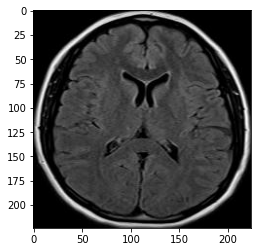

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


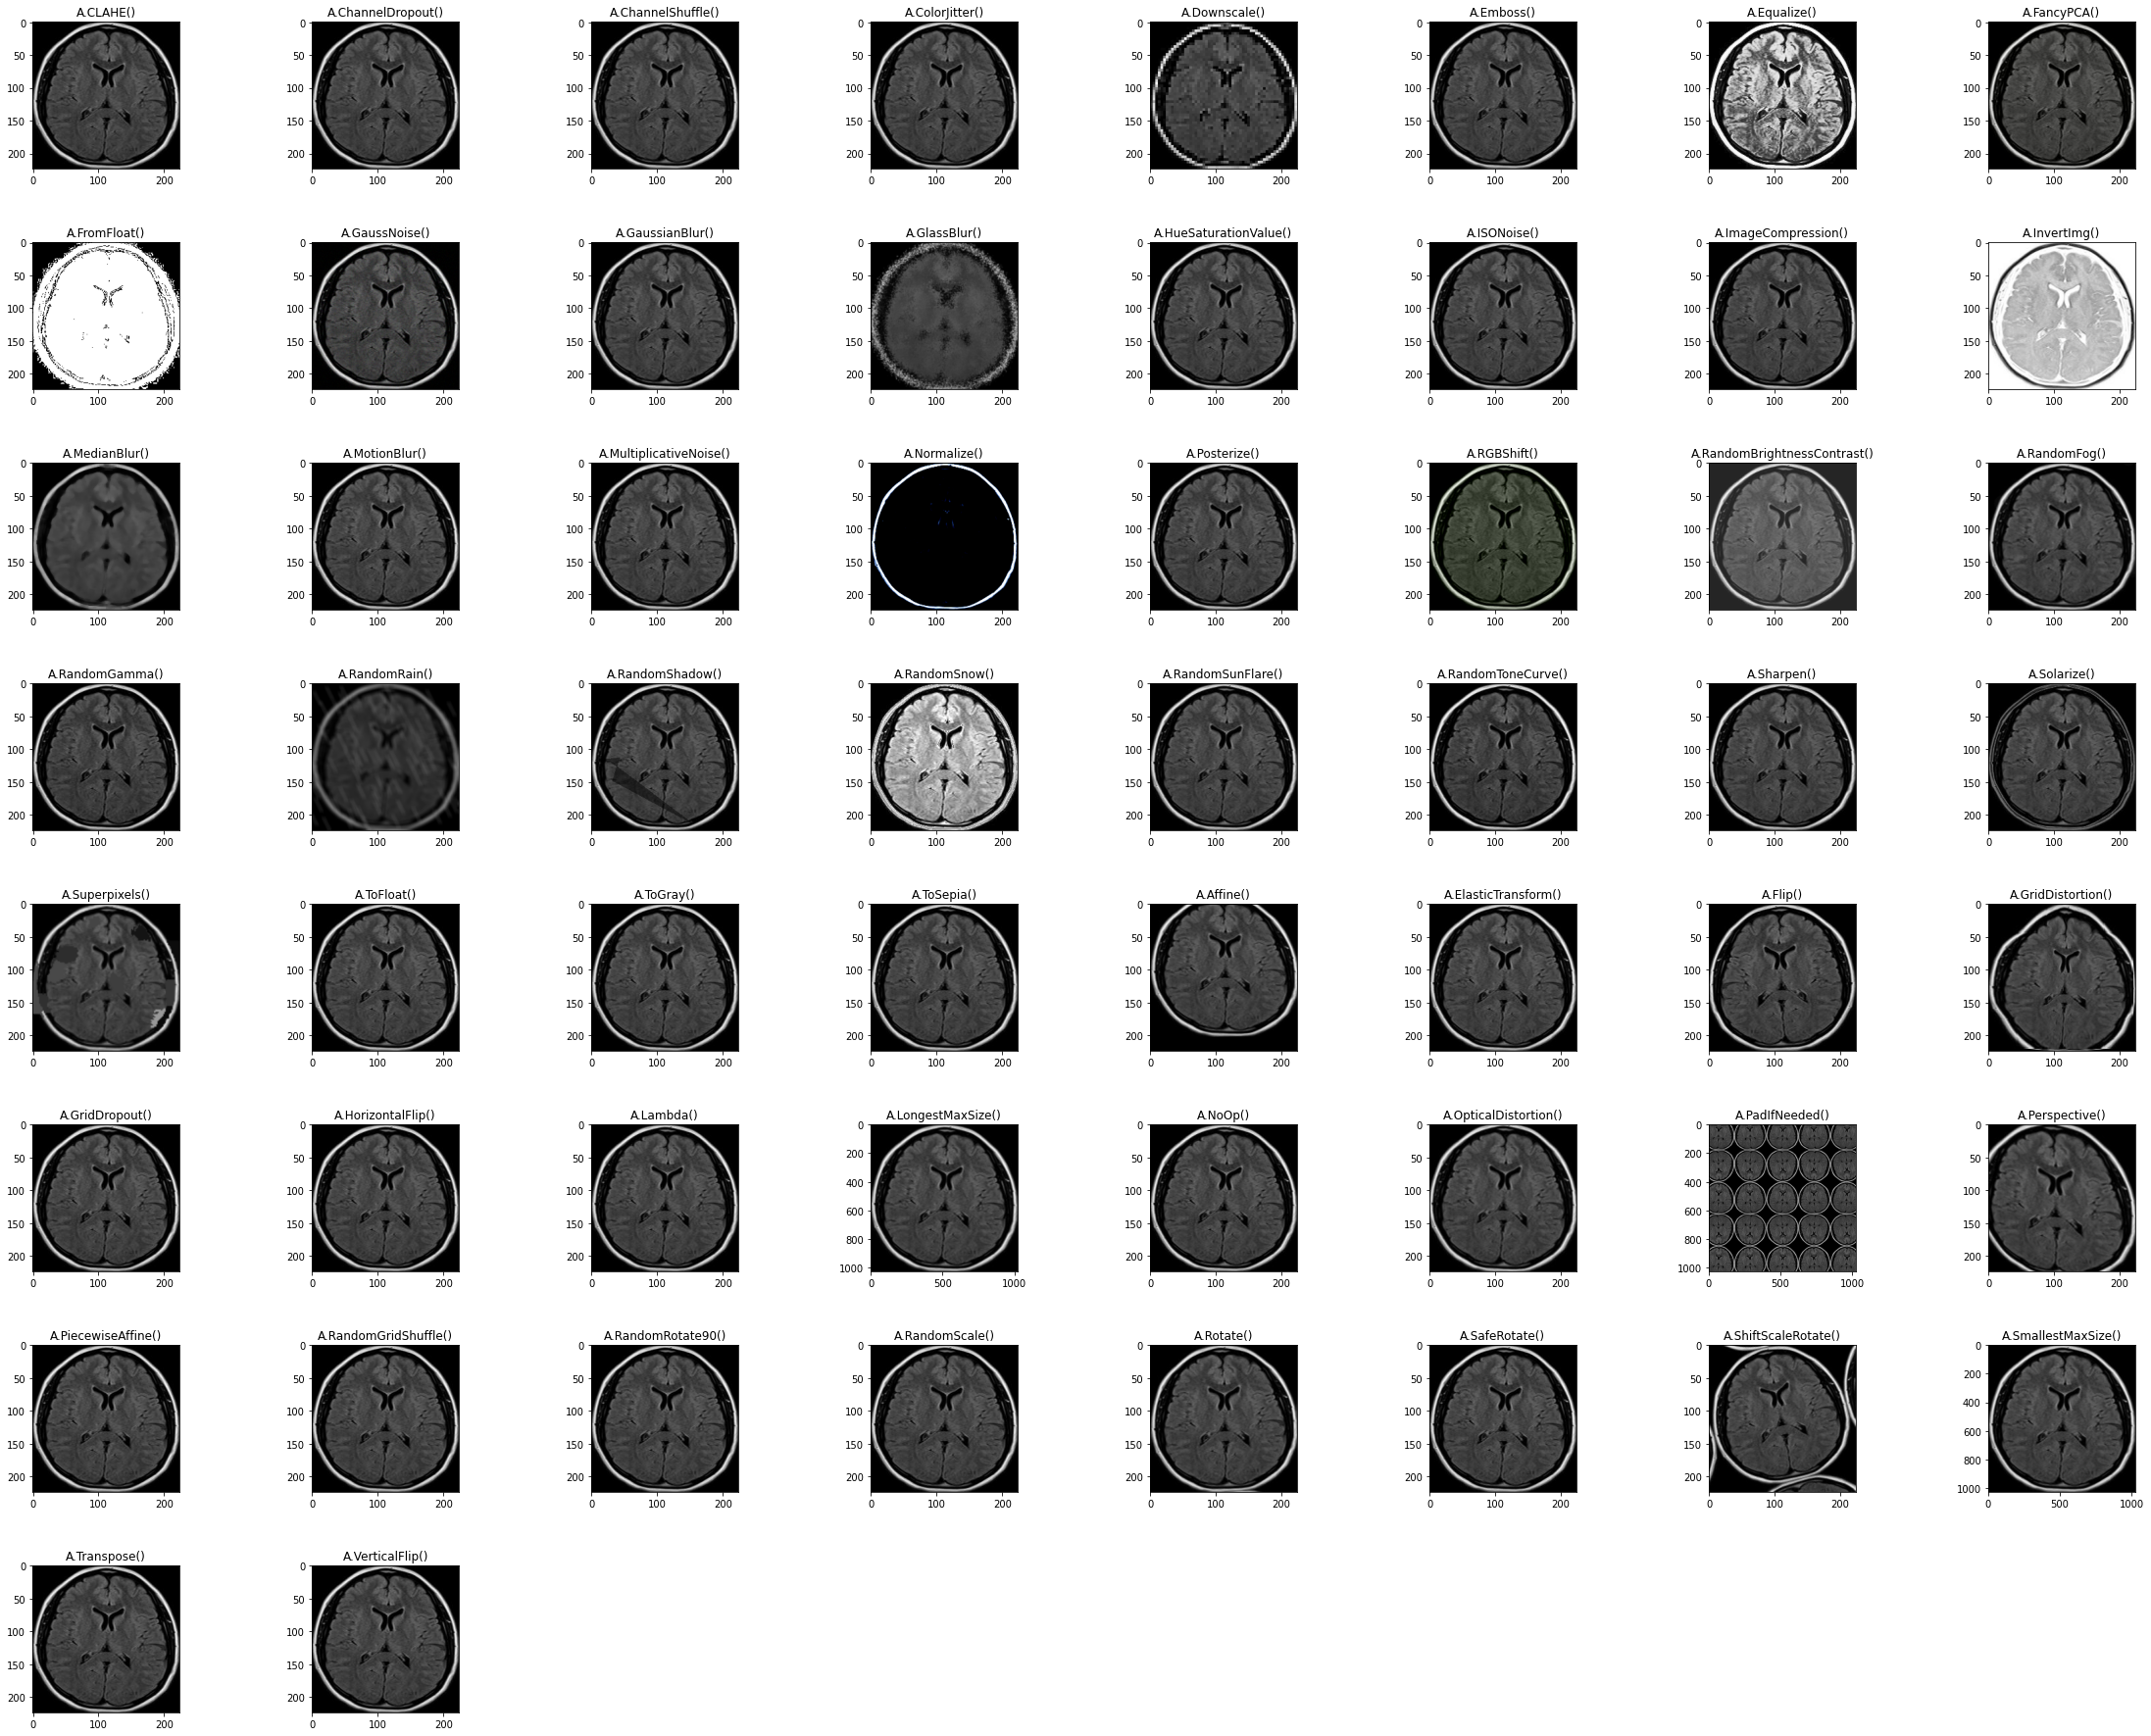

In [201]:

plt.imshow(image)
show()
plt.figure(figsize=[40,40])
plt.subplots_adjust(hspace=0.5)
for i in range(len(list_of_aug)):
    #print(list_of_aug[i])
    transform = A.Compose([eval(list_of_aug[i])])
    augmented_image = transform(image=image)['image']

    plt.subplot(10,8,i+1).set_title(list_of_aug[i])

    plt.imshow(augmented_image)

show()